In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [25]:
df = pd.read_csv("/content/data.csv")

print (df.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [26]:
df['radius_mean'].value_counts()

print(df.shape)

(569, 33)


In [27]:
def diagnosis_value(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
  
    df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)
    df.drop(['Unnamed: 32','id'],axis=1)

In [ ]:
def diagnosis_value(diagnosis):
	if diagnosis == 'M':
		return 1
	else:
		return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <a list of 10 Patch objects>)

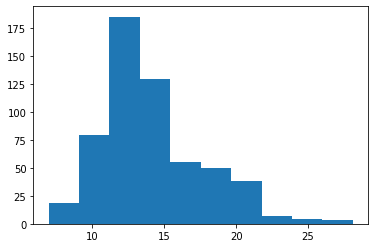

In [28]:
plt.hist(df['radius_mean'])

In [29]:
X = df[[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] .values  #.astype(float)
X[0:4]
y= np.array(df['diagnosis'])

In [30]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.48757756e+00, -2.14001647e-01,  1.31686157e+00,
         7.24026158e-01,  6.60819941e-01,  1.14875667e+00,
         9.07083081e-01,  1.88668963e+00, -1.35929347e+00,
         2.30360062e+00,  2.00123749e+00,  1.30768627e+00,
         2.61666502e+00,  2.10952635e+00,  2.29607613e+00,
         2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         7.42401948e-01, -6.05350847e-01, -6.92926270e-01,
        -4.40780058e-01,  2.60162067e-01, -8.05450380e-01,
        -9.94437403e-02,  1.80592744e+00, -3.69203222e-01,
         1.53

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 29) (455,)
Test set: (114, 29) (114,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=4)


In [34]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['M', 'B', 'B', 'B', 'M'], dtype=object)

In [35]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9714285714285714
Test set Accuracy:  0.9912280701754386


In [36]:
# write your code here
k=6
neigh1=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
print(neigh1)
#predicting
yhat6=neigh1.predict(X_test)
print('Train Accuracy is : ',metrics.accuracy_score(y_train, neigh1.predict(X_train)))
print('test accuracy is : ', metrics.accuracy_score(y_test, yhat6))

KNeighborsClassifier(n_neighbors=6)
Train Accuracy is :  0.9736263736263736
test accuracy is :  0.9736842105263158


In [37]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.96491228, 0.96491228, 0.99122807, 0.99122807, 0.99122807,
       0.97368421, 0.96491228, 0.97368421, 0.99122807])

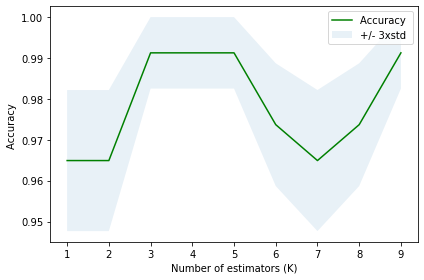

In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of estimators (K)')
plt.tight_layout()
plt.show()

In [39]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9912280701754386 with k= 3
